#**Week 2: Convolutional** **nets**

With material from the Pytorch [basic tutorial on optimization](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)

# Part II: Train LeNet on MNIST

We will create a LeNet-5 model and train it for the MNIST dataset.

Before we start, switch your colab runtime to the GPU, it will be useful this time!

Import relevant libraries

In [1]:
import torch
import torchvision
from torch import nn

## 1. Create an instance of LeNet-5, like in the 90's (Book 7.6.1)


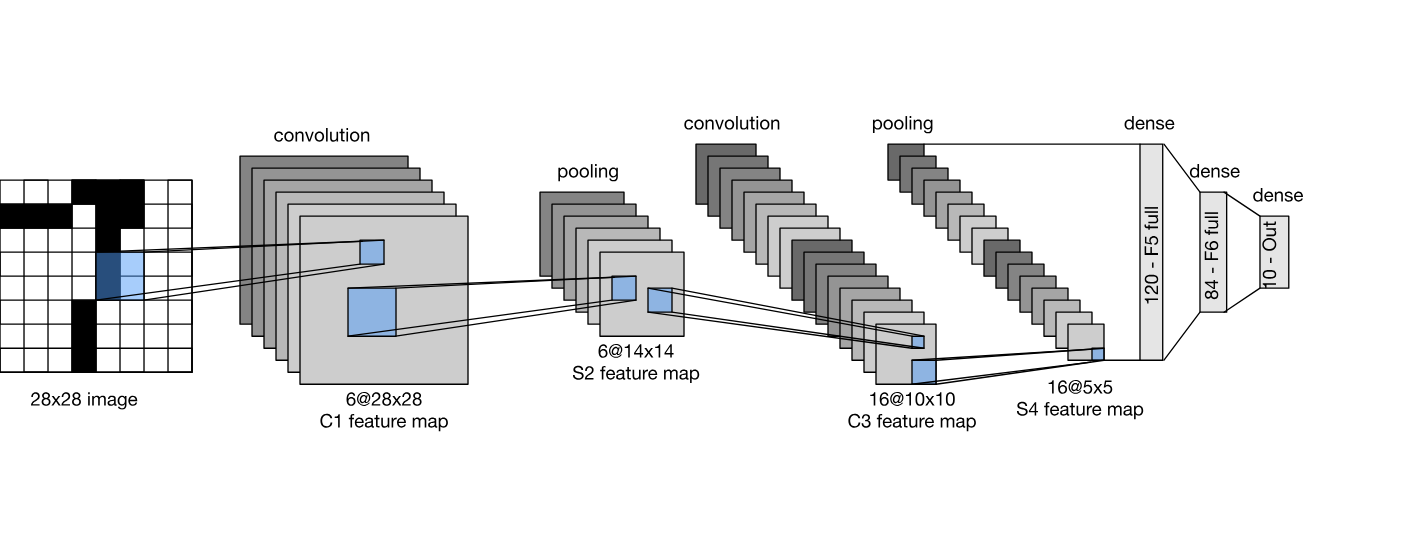

In [19]:
# Create an instance of LeNet-5
lenet5 = nn.Sequential(
        # 1st convolution 5x5, padding 2, 6 output channels
        nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5, padding = 2),
        # 1st activation function (sigmoid)
        nn.ReLU(),
        # 1st average pooling 2x2
        nn.AvgPool2d(2),

        # 2nd convolution 5x5, no padding, 16 output channels
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5),
        # 2nd activation function (sigmoid)
        nn.ReLU(),
        # 2nd avg pooling
        nn.AvgPool2d(2),

        # Flatten for the dense layers
        nn.Flatten(),

        # 3rd layer fully connected, outputs 120
        nn.Linear(16 * 5 * 5, 120),
        # 3rd activation function (sigmoid)
        nn.ReLU(),

        # 4th layer fully connected, outputs 84
        nn.Linear(120, 84),
        # 4th activation function (sigmoid)
        nn.ReLU(),

        # 5th layer fully connected, outputs 10
        nn.Linear(84, 10)
        )


Note in the lastest versions of Pytorch there are Lazy versions Conv2D and Linear, that infer the input size from the composition!

```
   #This is the first convolution 5x5, padding 2, 6 output channels
   nn.LazyConv2d(6, kernel_size=5, padding=2)
```

## Test your LeNet-5 architecture with a sample image

Create a random image tensor, the size of an image in MNIST.

1. You can simply apply as a function the LeNet5 model to the sample as `lenet5(sample)`.
   - Can you explain the model output?
   - What is the class suggested?

2. Iterate through all the layers and print the shapes of the outputs!

In [3]:
# declare your random image here, but with the right size
# and format that PyTorch likes
sample = torch.rand((1,1,28,28), dtype=torch.float)

# TODO: Your code here
sample_out = torch.LongTensor(10)
print(sample_out)

# Can you explain the model output?
# What is the class suggested?



tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [4]:
# let's visualize if everything works out and the size of all tensors.
# make the forward pass of your image X manually through the layers
# and print the layer and the shape of each output
for layer in lenet5:
    sample = layer(sample)
    print(layer, sample.shape)

# The output of the model is:
print(sample)

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) torch.Size([1, 6, 28, 28])
ReLU() torch.Size([1, 6, 28, 28])
AvgPool2d(kernel_size=2, stride=2, padding=0) torch.Size([1, 6, 14, 14])
Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)) torch.Size([1, 16, 10, 10])
ReLU() torch.Size([1, 16, 10, 10])
AvgPool2d(kernel_size=2, stride=2, padding=0) torch.Size([1, 16, 5, 5])
Flatten(start_dim=1, end_dim=-1) torch.Size([1, 400])
Linear(in_features=400, out_features=120, bias=True) torch.Size([1, 120])
ReLU() torch.Size([1, 120])
Linear(in_features=120, out_features=84, bias=True) torch.Size([1, 84])
ReLU() torch.Size([1, 84])
Linear(in_features=84, out_features=10, bias=True) torch.Size([1, 10])
tensor([[-0.0277, -0.0525,  0.0168,  0.0109, -0.0679,  0.1136,  0.0230,  0.1032,
         -0.0625,  0.0231]], grad_fn=<AddmmBackward0>)


## Load the MNIST dataset into a DataLoader

First we will get the dataset. MNIST is offered as a standard dataset via torchvision. Check the code below how to fetch it.

We will be using the GPU (check that it is enabled on your runtime).

We set the batch size to be 256.

In [5]:
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform= ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform= ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=256)
test_dataloader =  DataLoader(test_data,     batch_size=256)

## Working with batches
Let us inspect how to work with batch data.


In [6]:
# Get the next batch from the train_iter iterator
X, y = next(iter(train_dataloader))
print(X.shape)

torch.Size([256, 1, 28, 28])



Get one batch from the training dataset iterator, pass it through the model
and observe the shapes of the outputs of all layers. What do you observe?

In [7]:
# TODO: Your code here

# The output of the model is:

for b in train_dataloader:
    X, y = b
    print(X.shape)
    print(y[0])
    break
    
# We observe that the network has been applied in each image of the batch
# (sized 256), thus the first dimention of all tensors is 256
#
# To see the output for the first image in the batch we need to select for it!




torch.Size([256, 1, 28, 28])
tensor(5)


## Hyperparameters
Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates

We define the following hyperparameters for training:
- Number of Epochs - the number times to iterate over the dataset
- Batch Size - the number of data samples propagated through the network before the parameters are updated
- Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

We will initiate the training loop with the following parameters, and the Stochastic Gradient Descent optimizer. As its a classification problem we will use the Cross Entropy Loss.

- learning_rate = 0.001
- epochs = 5


In [8]:
learning_rate = 0.001
epochs = 5
model = lenet5

#1  Initialize SDG optimizer, loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


## Optimization Loop
Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an epoch.

Each epoch consists of two main parts:
The Train Loop - iterate over the training dataset and try to converge to optimal parameters.

The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.

First, we will initialize the weights, using Xavier uniform distribution, then send the model to GPU, and finally start the training loop!



In [9]:
# Re-initialize the weights using Xavier
def init_weights(layer):
    if type(layer) == nn.Linear or type(layer) == nn.Conv2d:
        nn.init.xavier_uniform_(layer.weight)

model.apply(init_weights)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

Its a common practice in Pytorch to name a variable with the training device. Lets set it to the GPU, as follows.

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [11]:
#2 Send to GPU (if available)

print('training on', device)
model.to(device)

training on cuda:0


Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

### The training loop
Inside the training loop, optimization happens in three steps:
1. Call `optimizer.zero_grad()` to reset the gradients of model parameters.
   
   Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
2. Backpropagate the prediction loss with a call to `loss.backward()`.
   
   PyTorch estimates the gradients of the loss w.r.t. each parameter.
3.  Once gradients are estimated, a call to `optimizer.step()` adjusts the parameters by the gradients collected in the backward pass.

In [12]:
# Start the training loop!

for epoch in range(epochs):
    print(f"Epoch: {epoch}")
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()

    # For each batch in the training data
    for batch, data in enumerate(train_dataloader):
        # Every data instance is an input + label pair
        # make sure we send it to GPU!
        inputs = data[0].to(device)
        labels = data[1].to(device)

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        if batch % 100 == 0:
            loss, current = loss.item(), batch
            print(f"loss: {loss:>7f}  [{current:>5d}]")



Epoch: 0


/home/llan/miniconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995622/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


loss: 2.316908  [    0]
loss: 2.313995  [  100]
loss: 2.305475  [  200]
Epoch: 1
loss: 2.297036  [    0]
loss: 2.298209  [  100]
loss: 2.293360  [  200]
Epoch: 2
loss: 2.281497  [    0]
loss: 2.285158  [  100]
loss: 2.282334  [  200]
Epoch: 3
loss: 2.268864  [    0]
loss: 2.271588  [  100]
loss: 2.268389  [  200]
Epoch: 4
loss: 2.253165  [    0]
loss: 2.254035  [  100]
loss: 2.248982  [  200]


Now let us evaluate the LeNet-5 model, on the test set.

In [13]:
# Set the model to evaluation mode - important for batch normalization and dropout layers
# Unnecessary in this situation but added for best practices
model.eval()

size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
test_loss, correct = 0, 0

# Evaluating the model with torch.no_grad() ensures that no gradients are computed
# during test mode also serves to reduce unnecessary gradient computations and
# memory usage for tensors with requires_grad=True

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        test_loss += loss_fn(outputs, labels).item()
        correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()

test_loss /= num_batches
correct /= size
print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


Test Error: 
 Accuracy: 36.7%, Avg loss: 2.234609 



Congratulations! You have trained your first CNN!
Note how using the GPU accelerated your training time!

But the results are far from perfect. Shall we try to optimize the training?

## Hyperparameter tuning
Now lets put all of it together, so that we can find good values for training the LeNet network!

We will organize the training and test code above, into two functions, that we can call in each epoch.

In [14]:
def init_train(model, device):
    model.apply(init_weights)
    print('training on', device)
    model.to(device)

def train_loop(train_dataloader, model, loss_fn, optimizer, device):
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    train_loss, correct = 0, 0

    # For each batch in the training data
    for batch, data in enumerate(train_dataloader):
        # Every data instance is an input + label pair
        # make sure we send it to GPU!
        inputs = data[0].to(device)
        labels = data[1].to(device)

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        train_loss += loss_fn(outputs, labels).item()
        correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()

    train_loss /= len(train_dataloader)
    correct /= len(train_dataloader.dataset)
    print(f"Train Error:  Accuracy: {(100*correct):>8f}%, Avg loss: {train_loss:>8f}")


def test_loop(test_dataloader, model, loss_fn, device):

    test_loss, correct = 0, 0

    model.eval()
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            test_loss += loss_fn(outputs, labels).item()
            correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()


    test_loss /= len(test_dataloader)
    correct /= len(test_dataloader.dataset)
    print(f"Test Error:   Accuracy: {(100*correct):>8f}%, Avg loss: {test_loss:>8f}")


Now you can easily change the hyperparemeters and check the model performance!

**Exercise**:
Evaluate the model performance for a couple of combinations of the learning rate (try higher values, i.e. 0.1, 0.5), and batch sizes (128, 256). How well does your model learn?

Fill in the following table, with your results!

| LR   | Batch| Epochs| Train accuracy | Test accuracy
|:----:|:----:|:-----:|:-----:|-----:
  0.1  | 128  |  10   |  x%| x%
  0.1  | 128  |  25   |  x%| x%
  0.1  | 128  |  50   |  x%| x%
  0.5  | 256  |  10   |  x%| x%

(You can share with your partner the load!)

In [22]:
# TODO: Change the hyperparameters and record your scores!
epochs = 25
learning_rate = 0.009
batch_size = 128
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


init_train(model, device)

for t in range(epochs):
    print(f"\nEpoch {t}:")
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)
print("Done!")

training on cuda:0

Epoch 0:
Train Error:  Accuracy: 11.236667%, Avg loss: 2.301207
Test Error:   Accuracy: 11.350000%, Avg loss: 2.301076

Epoch 1:
Train Error:  Accuracy: 11.236667%, Avg loss: 2.301194
Test Error:   Accuracy: 11.350000%, Avg loss: 2.301067

Epoch 2:
Train Error:  Accuracy: 11.236667%, Avg loss: 2.301188
Test Error:   Accuracy: 11.350000%, Avg loss: 2.301063

Epoch 3:
Train Error:  Accuracy: 11.236667%, Avg loss: 2.301185
Test Error:   Accuracy: 11.350000%, Avg loss: 2.301061

Epoch 4:
Train Error:  Accuracy: 11.236667%, Avg loss: 2.301184
Test Error:   Accuracy: 11.350000%, Avg loss: 2.301059

Epoch 5:
Train Error:  Accuracy: 11.236667%, Avg loss: 2.301183
Test Error:   Accuracy: 11.350000%, Avg loss: 2.301058

Epoch 6:
Train Error:  Accuracy: 11.236667%, Avg loss: 2.301183
Test Error:   Accuracy: 11.350000%, Avg loss: 2.301058

Epoch 7:
Train Error:  Accuracy: 11.236667%, Avg loss: 2.301183
Test Error:   Accuracy: 11.350000%, Avg loss: 2.301058

Epoch 8:
Train Error

Had you used higher values for the learning rate, the model learned faster, and to a great score (above 95% accuracy).



Optional: Retrain the model on the CPU, and observe. How slower is the training process?

If you still have time,
1. Try to improve your model accuracy by using ReLUs.
2. Modify your code so that you use the test set as a holdout (independent) set. Use the last 5000 images of the training dataset as validation, and select the hyperparameters (learning rate and number of epochs) based on the performance on the validation set!

(See also Book exercises 7.6 - optional)